![](../assets/header-logo.png)

## *Processing of Dynamic Object Information in MPC-Planner*

**Automated and Connected Driving Challenges - Research Project**

**Research Topic *9: Processing of Dynamic Object Information in MPC-Planner***

| Author | Mail | Matriculation Number |
| --- | --- | --- |
| *Mohammed Azharudeen Farook Deen* | azharudeen.farook@rwth-aachen.de | *429189* |


#### Dependencies & Setup

##### Dependencies

*Below you can find a Jupyter notebook code cell showcasing how to install Python dependencies via pip or conda. It is also possible to install other system dependencies (e.g., for ROS). Note that admin privileges may be necessary to install system dependencies. These kind of dependencies can only be installed in the Docker container if working on ika's remote workstation*

In [14]:
import sys

# --- installation via pip -----------------------------------------

# install packages via pip
!{sys.executable} -m pip install \
    jupyter \
    matplotlib \
    numpy \
    tqdm \
    pandas \
    ipython \
    ipywidgets

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from IPython.display import display, Image, Video
import ipywidgets as widgets
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

### Abstract

In the pursuit of enhancing safety-centric decision-making in autonomous vehicle systems, we embarked on a project to refine the ACDC Course's Vehicle Guidance Software Stack. Our endeavor began with a deep understanding of the existing stack and the underlying issues. The focal point of the initial phase was the recalibration of the Dynamic Object Distance in the cost function, where we incorporated predictions of vehicle trajectories and their geometrical attributes to facilitate more informed decision-making. This was further enriched with the integration of a sigmoid modulation grounded on stopping distances, introducing an additional layer of safety. The innovation continued with the introduction of a dynamic weighting factor, which pivoted the priority from the closest leading vehicle to a system based on the inverse Time-to-Collision (TTC), nurturing a more responsive and foresighted control strategy. The culmination of this phase was a comprehensive performance analysis, leveraging tools like Rviz for visual simulation and rqt_plot for dissecting rosbag data, to scrutinize the system's decisions through various lenses including TTC, ego velocity, and cost function variations. This meticulous approach not only heightened the system's reliability but also laid a robust foundation for the exploration of advanced safety features in autonomous vehicles.

As we advanced to the latter phase, our focus shifted to embedding safety constraints at a deeper level, aiming to realize a system that inherently abides by safety norms through intrinsic constraints. Despite facing challenges including segmentation and runtime errors, we forged ahead, laying down a framework that, although not devoid of errors, holds a robust groundwork for future endeavors in safety-enhanced autonomous vehicle systems.

### Motivation

In an era dominated by autonomous systems and intelligent robotics, vehicular autonomy stands at the forefront of technological evolution. The alluring prospect of self-navigating vehicles promises not only a transformative shift in transportation dynamics but also the potential to drastically reduce accidents caused by human errors. However, to transition from promise to reality, it is imperative that these autonomous systems can make safety-centric decisions in complex and dynamic environments. Our motivation stems from this very challenge: to refine and enhance the decision-making capabilities of autonomous vehicles, ensuring they operate not just efficiently, but also with the utmost regard for safety. By diving deep into the intricacies of the ACDC Course's Vehicle Guidance Software Stack, our endeavor aims to pave the way for a new generation of vehicles that harmoniously blend performance with an unwavering commitment to safety.

### Trajectory Planning in Autonomous Systems
Trajectory planning is a pivotal aspect of autonomous systems, especially in the context of vehicular autonomy where the safety and efficiency of navigation are paramount. Typically, trajectory planning involves determining a series of states that a system should attain over time, ensuring smooth transitions while abiding by system dynamics and external constraints. In the early days, trajectory planning was often confined to static environments, focusing largely on the geometric aspects of the path. However, modern-day applications necessitate planning in dynamic environments, where the autonomous entities interact with other dynamic agents and static obstacles. This transition has ushered in a suite of sophisticated approaches like probabilistic roadmaps, rapidly-exploring random trees (RRT), and variations thereof, which consider not only the geometry but also the dynamics and uncertainties inherent in such environments.

##### Model Predictive Control in Trajectory Planning
One approach that has gained prominence in recent years is the utilization of Model Predictive Control (MPC) for trajectory planning. MPC operates by optimizing control inputs over a finite prediction horizon, incorporating the current state of the system, and the dynamics model. The salient feature of MPC is its ability to handle multivariate control problems and constraints naturally, making it an apt choice for the complex problem of autonomous navigation.

MPC's potential has been leveraged extensively in autonomous vehicular applications, offering a robust mechanism to optimize trajectories while considering the dynamics of the vehicle and the constraints of the environment. By continually updating the control inputs based on real-time measurements, MPC ensures a reactive system capable of adjusting to unforeseen changes and disturbances in the environment. While the merits of MPC are undeniable, offering a structured approach to handle complex dynamics and constraints, it also brings to the table a wealth of opportunities for further enhancement. The utilization of the predictive model allows for the incorporation of foresight into the control strategy, opening avenues for sophisticated strategies that can anticipate and negotiate dynamically changing environments adeptly.

However, the implementation comes with its set of challenges, particularly concerning computational demands, which can be quite intensive given the necessity for real-time solutions. Moreover, determining appropriate cost functions and constraints that accurately reflect the desired behavior is a non-trivial task, requiring a deep understanding of both the system dynamics and the operational environment.

In light of the above, our research navigates through the intricate landscape of MPC in autonomous vehicular systems, aiming to fine-tune the existing frameworks to foster safer and more efficient navigation strategies. By modifying cost functions and introducing new constraints, we aspire to steer the trajectory planning from being merely reactive to a more proactive and foresighted approach, ensuring safer navigation in dynamically evolving environments.

### MPC Problem Setup
In the given problem, a model predictive control (MPC) optimization problem is being set up for a trajectory planning algorithm. The MPC is initialized with a reference trajectory and an initial guess for the control inputs. In each iteration, the MPC updates the environment data and solves the optimization problem to find the optimal control inputs. The solution is then used to update the control inputs for the next iteration.


![Alt text](planning-1.png)


#### Objective Function
The objective is to minimize the cumulative cost over a prediction horizon, defined as:

$$
J = \sum_{k=0}^{K-1} L(X(k), U(k), T(k)) + E(X(K), U(K), T(K))
$$

where:

- $ J $ - The total cost to be minimized
- $ L $ - The intermediate cost function
- $ E $ - The final cost function
- $ X(k) $ - The state vector at time step $ k $
- $ U(k) $ - The control vector at time step $ k $
- $ T(k) $ - The time at time step $ k $
- $ K $ - The total number of time steps in the prediction horizon


#### State and Control Variables

The state vector $ \mathbf{X} $ and control vector $ \mathbf{U} $ at each time step are defined as:

$$
\mathbf{X} = \begin{bmatrix} x_0 & x_1 & x_2 & x_3 & x_4 & x_5 & x_6 \end{bmatrix}^T
$$
$$
\mathbf{U} = \begin{bmatrix} u_0 & u_1 \end{bmatrix}^T
$$

Where:

\begin{align*}
x_0 & : \text{X position} \\
x_1 & : \text{Y position} \\
x_2 & : \text{Distance} \\
x_3 & : \text{Vehicle velocity} \\
x_4 & : \text{Vehicle acceleration} \\
x_5 & : \text{Vehicle heading} \\
x_6 & : \text{Steering angle} \\
u_0 & : \text{Longitudinal jerk} \\
u_1 & : \text{Steering rate} \\
\end{align*}

#### Constraints
Control and state constraints are implemented to restrict the feasible region of solutions. The constraints are given by:

$
\text{{Control Constraints}}: 
\begin{cases}
-5.0 \leq j_{\text{{lon}}} \leq 5.0 \\
-0.4 \leq \alpha \leq 0.4 \\
\end{cases}
$

$
\text{{State Constraints}}: 
\begin{cases}
0.0 \leq x \leq 999999999 \\
0.0 \leq y \leq 999999999 \\
-3.5 \leq s \leq 3.5 \\
-0.4956735 \leq v \leq 0.4956735 \\
\end{cases}
$

#### Cost Function
A cost function is defined with several terms including:

- Path following term based on the distance to a reference path.
- Terms based on the deviation from reference values for different variables such as jerk, acceleration, and steering rate.
- A velocity term that encourages the vehicle to maintain a target velocity.
- Terms encouraging the vehicle to avoid collisions with dynamic objects and respect traffic signals.
#### System Dynamics
The vehicle's dynamics are described using a bicycle model, taking into account the longitudinal and lateral dynamics, and steering dynamics.
$$

\begin{align*}
\dot{x} &= v \cdot \cos(\psi) \\
\dot{y} &= v \cdot \sin(\psi) \\
\dot{s} &= v \\
\dot{v} &= a \\
\dot{a} &= j_{\text{lon}} \\
\dot{\psi} &= \frac{v}{\text{wheelBase}} \cdot \tan(\delta) \\
\dot{\delta} &= \alpha \\
\end{align*}
$$
Where:
- $ \dot{x} $, $ \dot{y} $, etc. are the derivatives of the state variables
- wheelBase is the wheelbase of the vehicle.



### Understanding the Cosine-Based Dynamic Object Cost Function

Before diving into complex cost functions and vehicle dynamics, we need to establish a fundamental understanding of the given function governing our problem.

$$
j_{\text{dyn}} = \left( w_{\text{dyn}} \cdot \left( \cos \left( \frac{\pi \cdot {d_{\text{obj}}}^2}{{d_{\text{ref,obj}}}^2} \right) + 1 \right)\right)^2 \qquad \text{if} \quad d_{\text{obj}} < d_{\text{ref}}
$$
represents a cost function associated with the proximity of a dynamic object in the environment. Here, $ d_{\text{obj}} $ is the distance to the dynamic object and $ d_{\text{ref,obj}} $ is a reference distance, which might represent a safety boundary or threshold. The term $ w_{\text{dyn}} $ is a weighting factor that scales the importance of this cost in the overall optimization.


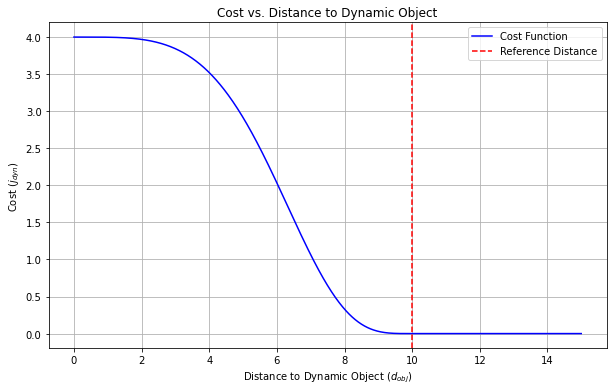

In [15]:
# Constants
w_dyn = 1.0  # example value for weighting factor
d_ref = 10.0  # example value for reference distance

# Generate distances for plotting
d_obj = np.linspace(0, 15, 1000)

# Calculate the cost function based on the given formula
j_dyn = np.where(d_obj < d_ref, (w_dyn * (np.cos(np.pi * d_obj**2 / d_ref**2) + 1))**2, 0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(d_obj, j_dyn, label="Cost Function", color="blue")
plt.axvline(x=d_ref, color='r', linestyle='--', label="Reference Distance")
plt.title("Cost vs. Distance to Dynamic Object")
plt.xlabel("Distance to Dynamic Object ($d_{obj}$)")
plt.ylabel("Cost ($j_{dyn}$)")
plt.legend()
plt.grid(True)
plt.show()

### Advantages of a Cosine-Based Function
In this equation, the cosine term plays a crucial role in penalizing risky behaviors or closeness to dynamic objects based on the object's distance ($d_{\text{obj}}$) from a reference point ($d_{\text{ref, obj}}$).

**1. Smooth Variability:**
Cosine functions offer smooth and continuous variability, which is beneficial in dynamic systems control where we aim to avoid abrupt changes in the control inputs, ensuring a smoother response.

**2. Easy to Manipulate:**
Cosine functions are mathematically tractable, allowing for easy manipulation and integration into complex equations and systems.

**3. Non-linear Behavior:**
A cosine-based function introduces non-linear behavior, which can more accurately represent the complex dynamics of real-world systems compared to linear functions.

**4. Bounded Output:**
The cosine function provides a bounded output, which is essential in control systems to prevent unbounded behavior and maintain system stability. The cos term varies between -1 and 1, giving a curve that has a clear peak at the point where the distance equals zero and then decreases symmetrically as the distance increases. By squaring the cosine term, we ensure that the function is always positive and has a pronounced peak at the reference point.

### Overall Drawbacks

Analyzing the existing cost function reveals several shortcomings that potentially undermine the safety and efficiency of the trajectory planning. These are:

1. **Temporal Ignorance**: The function only considers the current position of the dynamic object, ignoring the possible future positions of the object. Consequently, by the time the ego vehicle reaches the object's current position, the object would have already moved, rendering the trajectory planning less efficient and potentially unsafe.
   
2. **Geometric Negligence**: The cost function overlooks the geometries of both the ego vehicle and the other object, which can be critical in avoiding collisions and ensuring safe navigation. Incorporating the geometries would facilitate more accurate trajectory planning, taking into account the physical dimensions of the objects involved.

3. **Single Object Consideration**: The function is limited to considering a single object, typically the leading vehicle, neglecting other potential dynamic objects in the vicinity. This approach can be risky as it doesn't account for the holistic traffic scenario, potentially leading to unsafe trajectories.

4. **Trajectory Visualization**: As visualized in the accompanying figure, the planned trajectory (depicted in green) stops just before reaching the current position of the other dynamic object, highlighting the shortcomings mentioned above.


Utilizing a cosine-based function serves as a good starting point because of its mathematical properties and the physical interpretability of its parameters. It offers a smooth, bounded, and non-linear representation, making it suitable to model complex dynamics in control systems, especially in the initial stages of system design and analysis. As we progress, it might be beneficial to explore and possibly integrate other functions to fine-tune the system's response further.


### Relative Distance Calculation in Dynamic Environment
We start with the  relative distance parameter, which represents the distance between the ego vehicle and dynamic objects in its vicinity. Existing Relative Distance computed was using the current dynamic object position.

<br>

$$
{ dynObjDist } =\sqrt{({ dynObjX } - x[0])^2 +({ dynObjY } - x[1])^2}
$$

Where x[0] and x[1] are the x and y co-ordinates of the ego vehicle.
Our approach integrates kinematic predictions with geometric considerations to assess the proximity between an ego vehicle and a dynamic object. By predicting the future location of the dynamic object and adjusting for the sizes of both entities, the method offers a nuanced measure of proximity that can be used to inform decision-making and trajectory planning in dynamic environments.

#### Using Kinematic Equations:
Fundamental kinematic equation is given by:

$$ s = u t+\frac{1}{2} a x^2 $$ 
From this foundation, we can conjure the projected steps of our dynamic object in both horizontal (X) and vertical (Y) planes:
$$
   \text{{Projected X of dynObj}} = \text{{dynObjX}} + \text{{dynObjVx}} \cdot t + 0.5 \cdot \text{{dynObjAx}} \cdot t^2 \\
   \text{{Projected Y of dynObj}} = \text{{dynObjY}} + \text{{dynObjVy}} \cdot t + 0.5 \cdot \text{{dynObjAy}} \cdot t^2 

$$

   This term calculates the X-coordinate of the dynamic object at time $ t $ based on its initial position `dynObjX`, velocity in the X direction `dynObjVx`, and constant acceleration `dynObjAx`.   Similarly, this term calculates the Y-coordinate of the dynamic object at time $ t $ using the initial position in the Y direction, the velocity, and the constant acceleration.



#### Geometric Considerations:

To get the effective distance between the dynamic object and the ego vehicle, the geometric dimensions of the vehicles are considered. Instead of using the absolute distance between the centers of the two entities, the code adjusts this distance to account for their sizes. By subtracting half the sum of their lengths (`Length_ego` and `Length_dyn`), we get a distance that represents the closest approach of their edges, offering a more realistic measure of proximity in practical scenarios. 

$$
\text{{dynObjDist}} = \text{{Euclidean Distance}} - \left( \frac{{\text{{Length\_ego}} + \text{{Length\_dyn}}}}{2} \right)
$$

Including the geometric dimensions of the vehicles ensures that the relative distance computation is not just a point-to-point measurement, but one that accurately reflects the space that the vehicles occupy.



#### Conditional Checks:

A conditional check is already included to determine the cost associated with the relative distance:

$$
j_{\text{{dyn}}} = 
\begin{cases} 
  \left( \cos\left( \pi \cdot \left( \frac{{\text{{dynObjDist}}^2}}{{\text{{dynObjRef}}^2}} \right) \right) + 1 \right) & \text{if } \text{{dynObjDist}} < \text{{dynObjRef}} \\
  0 & \text{otherwise}
\end{cases}
$$

Here, if the computed relative distance `dynObjDist` is less than a reference distance `dynObjRef`, the cost is computed using the cosine function, similar to the formula shared earlier. Otherwise, the cost is zero, implying no penalty when the distance is beyond the reference.

### Incorporating Stopping Distance in Cost Function

The cost function must encapsulate all the critical parameters that influence the driving strategy. One such important parameter is the stopping distance, which refers to the distance a vehicle travels from the time a driver (or autonomous system) decides to halt to the moment the vehicle comes to a stop. It is the buffer we grant ourselves to respond to the unforeseen, a critical parameter that hinges on two vital components: the ego speed $v$ and the maximum deceleration $a_{\text{max}}$.  Its integration in the cost function is a conservative approach ensuring the readiness of the vehicle to stop safely amidst dynamically changing environments.

To enhance the safety measures, the stopping distance has been integrated into the cost function. The stopping distance $S$ is given by the equation:

$$
S = \frac{{v^2}}{{2 \cdot a_{\text{max}}}}
$$

A modified sigmoid function is employed to incorporate the stopping distance into the dynamic object cost computation, given by:

$$
\text{{sigmoidMod}} = \frac{2}{{1 + \exp\left(k \cdot (\text{{dynObjDist}} - 5\cdot \text{{stoppingDist}})\right)}}
$$

where $k$ is a tunable parameter, and dynObjDist is the relative distance computed considering the geometric dimensions and the kinematic equations as explained in the previous section. The use of a modified sigmoid function ensures a smooth transition in the cost function, preventing abrupt changes and fostering smoother navigation. The multiplier of 5 on the stopping distance in the sigmoid function acts as a conservative scale, further amplifying the safety margin, grounded on the philosophy of ‘Safety First’. 


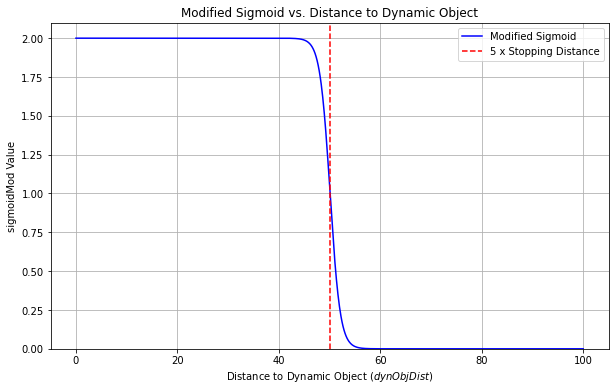

In [16]:
# Recompute the parameters and the modified sigmoid function
k = 1.0  # example steepness parameter
a_max = 5.0
speed = np.linspace(0, 20, 1000)  # vehicle speeds for demonstration
stoppingDist = speed**2 / (2 * a_max)
dynObjDist = np.linspace(0, 100, 1000)

# Compute the modified sigmoid function for a range of dynObjDist values and a representative speed
sigmoidMod = 2 / (1 + np.exp(k * (dynObjDist - 5 * stoppingDist[500])))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(dynObjDist, sigmoidMod, label="Modified Sigmoid", color="blue")
plt.axvline(x=5*stoppingDist[500], color='r', linestyle='--', label="5 x Stopping Distance")
plt.title("Modified Sigmoid vs. Distance to Dynamic Object")
plt.xlabel("Distance to Dynamic Object ($dynObjDist$)")
plt.ylabel("sigmoidMod Value")
plt.grid(True)
plt.legend()
plt.ylim(0, 2.1)
plt.show()

The dynamic object cost is then computed using a conditional expression that combines the cosine function (utilized in the previous approach) with the modified sigmoid function to provide a more robust cost metric, as shown in the equation:

$$
\text{{Combined Cost}} = 
\begin{cases} 
   \left( \text{{dynObjDist}} \cdot (1 + \text{{sigmoidMod}}) \right) & \text{if } \text{{dynObjDist}} < \text{{dynObjRef}} \\
  0 & \text{otherwise} 
\end{cases}
$$

By multiplying the original cost with (1 + sigmoid), the base behavior of the trajectory planner is preserved as it doesn't introduce multiplicities or divide the cost function, which could have led to potential inconsistencies or discontinuities. As the sigmoid increases, the combined cost can go up to 3 times the original cost. This happens when the ego vehicle is very close to the dynamic object within its stopping distance, thus "penalized" more heavily in these situations, emphasizing safety. This conscious integration of two pivotal parameters, a safe reference distance and stopping distance, manifests in the combined cost metric, into a harmonized function that blends the cosine function, rooted in the prior approach, and the newly introduced sigmoid function.


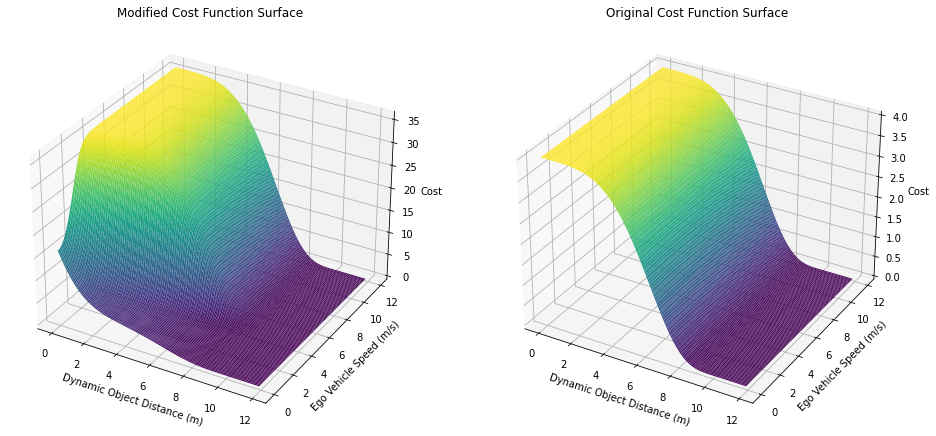

In [17]:
# Define the modified and original cost functions using np.where for element-wise condition application
def cost_function_modified(d_obj, ego_speed, w_dyn=1, d_ref_obj=10, k=1, a_max=5):
    d_stop = ego_speed**2 / (2 * a_max)
    j_dyn = np.where(d_obj < d_ref_obj, 
                     (w_dyn * (np.cos(np.pi * d_obj**2 / d_ref_obj**2) + 1) * (1 + sigmoid_mod(d_obj, k, d_stop)))**2, 
                     0)
    return j_dyn

def cost_function_original(d_obj, w_dyn=1, d_ref_obj=10):
    j_dyn = np.where(d_obj < d_ref_obj, 
                     (w_dyn * (np.cos(np.pi * d_obj**2 / d_ref_obj**2) + 1))**2, 
                     0)
    return j_dyn

# Get the Z values for both the cost functions
Z_modified = cost_function_modified(X, Y)
Z_original = cost_function_original(X)

# Plotting
fig = plt.figure(figsize=(16, 8))

# Plot for modified cost function
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z_modified, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax1.set_title('Modified Cost Function Surface')
ax1.set_xlabel("Dynamic Object Distance (m)")
ax1.set_ylabel("Ego Vehicle Speed (m/s)")
ax1.set_zlabel("Cost")

# Plot for original cost function
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X, Y, Z_original, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax2.set_title('Original Cost Function Surface')
ax2.set_xlabel("Dynamic Object Distance (m)")
ax2.set_ylabel("Ego Vehicle Speed (m/s)")
ax2.set_zlabel("Cost")

plt.show()



From the 3D plots displayed, we can observe notable differences in the behavior of the modified and original cost functions which illustrate the advantages of the modified function. 

First, the modified cost function offers a richer representation of the environmental dynamics into its formulation. This means it can account for different scenarios more flexibly, adapting the cost not just based on the proximity to a dynamic object but also considering the vehicle's current speed and braking capabilities, which is essential for maintaining safety and efficiency in dynamic environments. Furthermore, the integration of the sigmoid function into the modified cost function allows for a smoother transition in the cost values as the distance to the dynamic object varies. This potentially facilitates a more graceful adaptation to changing circumstances, avoiding abrupt changes in control strategies, which might occur with a simpler cost function.

On the other hand, the original cost function is much simpler, relying solely on the distance to the dynamic object to determine the cost. While this might be computationally less intensive, it lacks the depth of responsiveness to the changing dynamics of the environment exhibited by the modified function, potentially leading to less


### Considering multiple dynamic objects in the cost function

In a dynamic environment, the temporal aspect plays a pivotal role in determining the potential risks associated with different objects. By incorporating a dynamic weighting factor based on the Time to Collision (TTC) metric, we introduce a temporal dimension into the trajectory planning process, allowing the system to prioritize objects based on their respective TTCs, to mitigate risks timely.

#### Time to Collision (TTC):

For a given object, the TTC can be calculated using relative positions and velocities of the ego vehicle and the object. Symbolically, it can be represented as:

$$
\text{TTC} = \frac{\Delta v}{\Delta s}
$$

- $ \Delta s $: is the relative distance between the ego vehicle and the object.
- $ \Delta v $: is the relative velocity between the ego vehicle and the object.


In our problem, we use the absolute velocity of the ego vehicle to calculate the TTC. Using the absolute velocity, as opposed to the relative velocity, can provide a more stable denominator in the TTC equation, which helps to avoid extreme values of TTC in scenarios where the relative velocity is very small.

Using the relative distance ($\Delta s$) and the absolute velocity of the ego vehicle to calculate the TTC:

$$
\text{TTC} = \frac{\Delta s}{\text{absolute velocity of ego vehicle}}
$$

The benefit of using the absolute velocity is that it can provide a more straightforward representation of the ego vehicle's state and make the TTC calculation more robust and less sensitive to fluctuations in the velocities of other objects, providing a stable basis for collision risk assessment and decision-making in the trajectory planning system. The denominator in the TTC calculation remains stable, avoiding potential issues with very small or even zero values that can occur when using relative velocity.


#### Dynamic Weighting Factor ($w_{\text{dyn}}$):

Each object is assigned a dynamic priority based on its inverse TTC(1/TTC):

$$
w_{\text{dyn}, i} = \frac{\text{Inverse TTC}_i}{\sum_{j=1}^N \text{Inverse TTC}_j}
$$

- $i$: is the index of the current object 
- $N$: is the total number of objects. The denominator represents the summation of inverse TTCs for all objects.

#### Summation of Costs:

The total cost when considering multiple objects is the sum of individual costs for each object, where each individual cost is computed using the corresponding dynamic weighting factor:

$$
J_{\text{total}} = \sum_{i=1}^N J_{\text{dyn}, i}(w_{\text{dyn}, i})
$$
- $J_{\text{dyn}, i}$: is the cost for the $i$ th object computed using the formula:
  $$
  J_{\text{dyn}, i} = \left( w_{\text{dyn}, i} \cdot \left( \cos \left( \frac{2\pi d_{\text{obj}, i}}{d_{\text{ref, obj}}} \right) + 1 \right) \right)^2 \text{ if } d_{\text{obj}, i} < d_{\text{ref}}
  $$
- $d_{\text{obj}, i}$: is the distance to the $i$ th object.

This formulation ensures that the trajectory planning system considers all objects in the environment, giving importance to those that pose a more immediate risk based on their TTC.

#### Choosing one Highest Priority Target:

We opted to focus on the single highest-priority object as our critical target. This decision was from a computational and validation standpoint, adapting the code to return priorities for every object would also require significant refactoring with limited capability to validate multi-object considerations in our current object dataset.

#### Final Cost Term:

$$
J = \left( \left( \cos \left( \frac{\pi \times d_{\text{modified}}}{2d_{\text{dynObjRef}}} \right)^2 + 1 \right) \times \left( 1 + \text{sigmoid}\left( d_{\text{modified}}, k, d_{\text{stopping}} \right) \right) \times w_{\text{dyn}} \right)^2
$$

- $w_{\text{dyn}}$: is the dynamic weighting factor, set as the maximum of the computed priorities (e.g., based on inverse TTC).


### Performance Analysis



#### Original Model
To present a baseline for comparison, the performance of the distance only cost function is visualized and the time to collision metric is evaluated. Uncomment lines 146 to 149 in the file **trajectory_planner.cpp** and build the package once again using the command below in the docker workspace under 'catkin_workspace'. Also, uncomment line 1025 and comment line 1026 in the file **trajectory_planner.hpp**.(Link for ROSbag: https://studentsrwthaachende-my.sharepoint.com/:u:/g/personal/26k7wmsc8zja2f6e_students_rwth-aachen_de/Ef5cQv8ewztPohZrvjMG8LIBaTcQUVHIaoiXKj3q5Y5jAA?e=6KU82c)

```bash
source devel/setup.bash
catkin build trajectory_planner
```

![Alt text](originalf.png)

#### Modified Dynamic Object Model

Uncomment lines 155 to 170 in the file **trajectory_planner.cpp** and build the package once again using the command below in the docker workspace. Also, uncomment line 1026 and comment line 1025 in the file **trajectory_planner.hpp**.(Link for ROSBag: https://studentsrwthaachende-my.sharepoint.com/:u:/g/personal/26k7wmsc8zja2f6e_students_rwth-aachen_de/EVs9nuuM8lhJsoXidA2JzUsBRrVMZ5zV9FOtuEOSNhgQmQ?e=miPP2a)

```bash
source devel/setup.bash
catkin build trajectory_planner
```

<video src="Untitled%20video%20-%20Made%20with%20Clipchamp-1-1.mp4" controls title="Title"></video>

![Alt text](modifiedf.png)

### Discussion:

- The velocity curve for the modified cost function is smoother when approaching a dynamic object, implying a more natural and comfortable driving experience. Smoother velocity curves indicate that the vehicle is able to anticipate obstacles and adjust speed more proactively and gently, rather than reacting abruptly.

- The modified cost function avoids drastic reductions or shows fewer spikes in TTC. This indicates that the vehicle is making maneuvers that reduce the risk of collision. 

- The original cost function  offers limited insights into the temporal aspects as it primarily focuses on spatial parameters. In the modified cost function, the incorporation of ego speed not only provides a dynamic response to the spatial parameters but also aligns the cost behavior with the temporal dimension represented by TTC. This alignment ensures that as the TTC decreases, indicating a potential increase in collision risk, the cost function reacts proactively, increasing the cost associated to trajectories that lead to closer proximities with other objects in a shorter time frame.

- The cost curve is lower  with the modified cost function, indicating that the vehicle's actions are more in line with our desired safety and efficiency criteria. A stable and ideally reduced cost curve means the modified function is achieving its objectives in a more efficient manner.

### Transition to Constraint-Level Collision Avoidance

To facilitate more efficient and reliable collision avoidance, we are considering a transition from modifying the cost function to introducing constraint-level collision avoidance. This approach is largely inspired by the non-cooperative Distributed Model Predictive Control (NonCoop. DMPC) wherein each agent, or vehicle, optimizes its trajectory independently while respecting certain coupling constraints that involve neighboring agents. In NonCoop. DMPC, each agent governs itself through its localized controller, which leverages only personal objectives and constraints alongside those shared with immediate neighbors. While this approach leans towards a more "greedy" strategy, with agents chiefly concerned about their trajectories, it assures respect for coupling constraints, paving the path for a globally viable solution that is both time-efficient and safe.


#### Vehicle Collision Avoidance Constraints

To prevent collisions, it's imperative to enforce constraints that maintain a safety distance between vehicles. The constraint ensures the distance between any two vehicles $v_i$ and $v_j$ at any point in time is greater than a specified safety distance:

$$
\sqrt{(x^{(i)}(t+k) - x^{(j)}(t+k))^2 + (y^{(i)}(t+k) - y^{(j)}(t+k))^2} \geq d^{(i,j)}_{\text{safe}}, \quad k = 1, \ldots, K
$$

Where:
- $x^{(i)}(t+k)$ and $y^{(i)}(t+k)$ are the X and Y positions of the $i$-th vehicle at time step $t+k$.
- $x^{(j)}(t+k)$ and $y^{(j)}(t+k)$ are the X and Y positions of the $j$-th vehicle at time step $t+k$.
- $K$ is the prediction horizon.
- $d^{(i,j)}_{\text{safe}}$ is the safe distance between vehicles $i$ and $j$.


This strategy leverages vehicle-to-vehicle communication for obtaining optimized predictions of neighboring vehicles' positions, facilitating more informed and safe decision-making in non-cooperative settings.


#### Building the Platform

We developed some modifications that will substantially augment the existing ACDC Vehicle Stack framework, paving the way for a more robust and efficient system. The underlying steps involved:

##### Accommodating Overtaking Maneuvers

- **Modifying the URDF, .yaml and launch files**: These files were appropriately altered to facilitate the publishing of state information in distinct topics. This modification led to the creation of two nodes for each vehicle, aligning well with the flatland state publisher.
- **Scaling the vehicles to 0.5**: The URDF file was updated to scale the vehicles to a factor of 0.5. Following this, the positions of the wheel joints were accordingly readjusted to match the new scale.
- **Adjusting the Default Reference Points**: The reference points were revised from being at the midpoint to being at a quarter of the sum of the left and right boundaries.(lines 936 to 937 in the file **trajectory_planner.hpp**) 

##### Processing Multiple Vehicle Trajectory

- **Custom Message Type**: In a bid to streamline the data flow, we introduced a custom message type. The inception of a new message type permits the aggregation and broadcasting of a solitary message derived from various individual message sources such as Ego Pose Data (Odometry), vehicle wheel sensor data, and MPC prediction data.(lines 632 to 652 in the file **trajectory_planner.hpp**)

- **Successful Transformation**: To facilitate the handling of vehicle trajectory data, we have devised a method that transforms the trajectory data of one vehicle (vehicle_body_2) from its local reference frame (laser_front_ref_2) to another vehicle's reference frame (laser_front_ref_1). Upon a successful transformation, the point is retained in global variables, earmarked for constraint processing. In instances where the transformation is unsuccessful, a warning is initiated, culminating in an early return of the function, thereby averting segmentation errors.(lines 592 to 629 in the file **trajectory_planner.hpp**)

##### Addressing Reference Spline Inaccuracies
 During our analysis, we identified inaccuracies in the reference splines, a critical component for the MPC planner. Despite our substantial efforts to rectify this, the issue persisted. Below we delineate our approach and the strategies we employed in our attempt to generate a more accurate and smoother reference path for the vehicles, grounded on the data derived from the left and right boundaries.


- **Higher Resolution**: To encapsulate more details of the boundaries, we elevated the number of points in the reference path.(line 368 in the file **trajectory_planner_2.hpp**)

- **Higher Order Spline Interpolation**: Leveraging Eigen's Spline Interpolation method, we transformed the boundary points into cubic spline representations, aspiring to foster a smoother path derivation.(line 850 in the file **trajectory_planner_2.hpp**)

- **Weighted Sampling**: We introduced a strategy to prioritize immediate points during the sampling process, aiming to concentrate on the most pertinent data points.

- **Projection**: To amend any deviations, we projected the boundary points onto the closest spline, thereby working towards the realization of a more accurate path.

- **Iterative Adaptive Resampling**: To yield a smooth and reliable path, we conceived an iterative adaptive resampling strategy which encompassed the following steps:
 1. **Interpolation**: Initially, we interpolated the data points to foster a preliminary path.
 2. **Resample Path**: Following the initial interpolation, we resampled the path to attain a more refined trajectory.
 3. **Adjust Interpolation Parameters**: Adjusting the interpolation parameters was vital, basing the alterations on the distances discerned between the resampled points.
 4. **Iteration**: We engaged in a cyclic process, revisiting the above steps to inch closer to our objective. (lines 834 to 876 in the file **trajectory_planner_2.hpp**)


To run the modified Autonomous Collision Detection Collision Detection (ACDCD) framework in your new ROS workspace in the folder 'catkin_workspace_2':

```bash
source devel/setup.bash
catkin clean
catkin build trajectory_planner


Despite our concerted efforts, the initiative did not yield the anticipated results, leaving room for further exploration and development in the future. The yellow lines of the lead vehicle in the video below are the visualized boundary splines for reference. 


<video src="Untitled%20video%20-%20Made%20with%20Clipchamp%20(1).mp4" controls title="Title"></video>

### Error Handling
In the process of modifying the existing ACDC Vehicle Stack framework to incorporate the new constraints, we made substantial changes to the code structure, taking meticulous steps to handle potential runtime errors and ensure the system's robustness.

##### Combined Topic Callback

- **Handling Empty X or Y Data**: Before proceeding with data transformation, the function checks if the X or Y data arrays are empty, issuing a warning and exiting early to prevent further issues if true.

- **Transformations with Error Handling**: While transforming point data from one vehicle reference frame to another, we encapsulated the transformation process within a try-catch block to gracefully handle any tf2::TransformException exceptions that might be thrown, thereby preventing crashes and maintaining stability.

- **Logging Transformed Data**: Successful transformations are logged to facilitate debugging and verification of the transformed data, aiding in the ongoing development process.


##### Collision Avoidance Constraint Class

- **Dynamic Indexing with Error Handling**: While computing the distance in the evaluate function, we employed dynamic indexing to reference the predicted points. However, we also implemented a check to prevent index out-of-bounds errors, issuing a warning if such a situation arises.

- **Predicted Points Initialization**: We initialized the predicted points (x_pred and y_pred) with a default value to ensure that the vectors are never empty, thereby avoiding segmentation faults during runtime.


### Reference Code Snippet
```
void combinedTopicCallback(const definitions::CustomMessageType& msg)
    {          
        if (msg.vehicle_state.header.frame_id == "vehicle_body_2") {
            x_pred.clear();
            y_pred.clear();
        if (msg.vehicle_traj.X.empty() || msg.vehicle_traj.Y.empty()) {
        ROS_WARN("Received empty X or Y data in the message. Not updating x_pred and y_pred.");
        return;
        }

        geometry_msgs::PointStamped point_in, point_out;

            for (size_t i = 0; i < 20; ++i) { // Assuming X and Y are of the same size
                point_in.header.frame_id = "laser_front_ref_2";
                point_in.header.stamp = ros::Time::now();  // Use the timestamp of your message if available
                point_in.point.x = msg.vehicle_traj.X[i];
                point_in.point.y = msg.vehicle_traj.Y[i];
                point_in.point.z = 0; // Assuming z is 0, adjust if necessary

                try {
                    geometry_msgs::TransformStamped transform = transform_buffer->lookupTransform("laser_front_ref", "laser_front_ref_2", ros::Time(0));
                    tf2::doTransform(point_in, point_out, transform);
                    x_pred.push_back(point_out.point.x);
                    y_pred.push_back(point_out.point.y);
                } catch (tf2::TransformException &ex) {
                    ROS_WARN("%s", ex.what());
                    // ros::Duration(1.0).sleep();
                    return;
                }
            }

            if (!x_pred.empty() && !y_pred.empty()) {
                ROS_INFO_STREAM("\nVehicle 2 transformed (x, y): (" << x_pred.front() << ", " << y_pred.front() << ")"
                );
            }

        }}

template <class VEHICLESYSTEM>
class CollisionAvoidanceConstraint : public ct::optcon::ConstraintBase<VEHICLESYSTEM::STATE_DIM, VEHICLESYSTEM::CONTROL_DIM>
{
public:
    EIGEN_MAKE_ALIGNED_OPERATOR_NEW
    typedef ct::optcon::ConstraintBase<VEHICLESYSTEM::STATE_DIM, VEHICLESYSTEM::CONTROL_DIM> Base;
    typedef ct::core::StateVector<VEHICLESYSTEM::STATE_DIM> state_vector_t;
    typedef ct::core::ControlVector<VEHICLESYSTEM::CONTROL_DIM> control_vector_t;

    CollisionAvoidanceConstraint(const std::vector<double>& x_pred, const std::vector<double>& y_pred, const double& d_safe)
        : x_pred_(x_pred), y_pred_(y_pred), d_safe_(d_safe)
    {   
        Base::lb_.resize(1);
        Base::ub_.resize(1);
        Base::lb_.setConstant(0);
        Base::ub_.setConstant(std::numeric_limits<double>::max());
    }

    virtual CollisionAvoidanceConstraint *clone() const override { return new CollisionAvoidanceConstraint(*this); }
    virtual size_t getConstraintSize() const override { return 1; }

    virtual Eigen::VectorXd evaluate(const state_vector_t &x, const control_vector_t &u, const double t) override
    {
        Eigen::VectorXd val(1);
        val.setZero();
        size_t i = 0;

        // size_t i = static_cast<size_t>(t / 0.2);
        if (!x_pred_.empty() && !y_pred_.empty()){
        // if (i < x_pred_.size() && i < y_pred_.size()) {
            double dist = (x[0] - x_pred_[i]) * (x[0] - x_pred_[i]) + (x[1] - y_pred_[i]) * (x[1] - y_pred_[i]);
            val(0) =  dist - d_safe_ ;}
        // } 
        else {
            ROS_WARN("Index out of bounds. Cannot compute distance.");
        }

        return val;
    }
private:
    std::vector<double> x_pred_, y_pred_;
    double d_safe_;
};

void initMPC()
    {
        // Constraint
        double d_safe = 2.0;
        x_pred = std::vector<double>(20, d_safe);    
        y_pred = std::vector<double>(20, d_safe);
        std::shared_ptr<CollisionAvoidanceConstraint<systemDynamics>> distanceConstraint(new CollisionAvoidanceConstraint<systemDynamics>(x_pred, y_pred, d_safe));
        constraints->addIntermediateConstraint(distanceConstraint, false); 
        constraints->initialize();
    }
```

#### Discussion
Despite our concerted efforts to integrate the new constraint and handle potential errors judiciously, we encountered persistent runtime errors that couldn't be resolved within the current development cycle. While we were able to handle segmentation errors to a considerable extent, the runtime errors remain a challenge, urging a deeper dive into the problem in future iterations. The code has been seamlessly transferred to the IPython notebook, setting a concrete base for further advancements and refinements in the error handling process, and ensuring the robustness of the ACDC Vehicle Stack framework. The successful integration of the updated constraints into the ACDC Vehicle Stack framework could have paved the way for several innovative advancements in autonomous vehicle technology. 

Firstly, it could have facilitated the development of a decentralized Net-MPC system, where each agent not only takes its own control actions but also considers the future intentions of other agents, fostering more collaborative and safe environments. 

Secondly, the refinement could have been a cornerstone in the evolution of Smart CAMs, by enriching Cooperative Awareness Messages with detailed and accurate information, thereby enabling coordinated planning and enhancing situational awareness significantly. 

Next, the integration could have opened doors for the incorporation of other influential cost terms such as lag error and contour error, contributing to a more nuanced and effective trajectory planning process.

Lastly, the foundation would have been laid for behavior conditioning, a feature where the system could predict and understand agent behavior patterns solely based on predictions, allowing for the identification and correction of anomalies to achieve desired outcomes. The ripple effect of this would have been monumental, steering towards a landscape of predictive and cooperative autonomous driving with heightened safety and efficiency.

### Conclusion


Over the course of this project, we embarked on a meticulous journey of enhancing the trajectory planning system for autonomous vehicles, diving deep into the intricacies of cost functions and their implications on safe and efficient navigation.

A significant milestone was achieved through the refinement of the original cost function, introducing a dynamic perspective into the equation by incorporating parameters such as ego speed and a sigmoid function to anticipate stopping distances. This modification not only enriched the representation of environmental dynamics but also brought in a temporal component through the alignment with the Time to Collision (TTC) concept, thereby fostering a more proactive and anticipatory approach to collision avoidance. Our strategy of focusing on the highest-priority object as the critical target streamlined the computational process, maintaining a balance between safety and efficiency, while leaving room for further exploration into multi-object considerations in future work. Then, we visualized the effects of the modified cost function through rqt_plotting from recorded ros bag, providing a deeper insight into the relationship between various parameters such as ego vehicle speed, ego acceleration, TTC, and the resulting cost. 

In our pursuit of optimization, we strived to incorporate constraint levels to further streamline the trajectory planning process. Despite our concerted efforts, integrating these constraint levels posed substantial challenges. However, this experience has provided us with invaluable insights and a deeper understanding of the complexities involved, setting a clear pathway for future endeavors in this direction. In the backdrop of these advancements, we also fine-tuned the ROS infrastructure to facilitate the streamlined publishing of state information in distinct topics for multiple objects, thereby aligning perfectly with the flatland state publisher and paving the way for a more organized data flow and retrieval system.

As we stand at the culmination of this project, we can reflect on a trajectory planning system that is not only more informed and anticipative but also one that stands robust in the face of dynamic environments, promising safe and smooth navigation.Looking forward, the foundation laid through this project opens up avenues for further refinement and exploration. The modified cost function stands as a testament to the potential benefits of a dynamically responsive and anticipatory system, urging us to delve even deeper, perhaps exploring the realms of machine learning and artificial intelligence to further enhance the predictive accuracy and responsiveness of autonomous vehicle systems.

We close with a note of appreciation for the collaborative spirit and the relentless pursuit of innovation that fueled this project, standing as a beacon of what can be achieved through meticulous research and a passion for pushing the boundaries of technology.   

### References

1. Liu, Wenjun, et al. "Gaussian process based model predictive control for overtaking in autonomous driving." *Frontiers in Neurorobotics* 15 (2021): 723049.

2. B. Alrifaee. "Networked Model Predictive Control for Vehicle Collision Avoidance." PhD thesis, RWTH Aachen University, 2017.

3. Palatti, Jiyo, et al. "Planning for safe abortable overtaking maneuvers in autonomous driving." 2021 IEEE International Intelligent Transportation Systems Conference (ITSC). IEEE, 2021.

4. Kabzan, J., Hewing, L., Liniger, A., & Zeilinger, M.N. "Learning-based model predictive control for autonomous racing." IEEE Robotics and Automation Letters, 2019, 4(4), pp.3363-3370.

5. Minderhoud, M. M., &amp; Bovy, P. H. L. (2000, September 25)| [Extended time-to-collision measures for road traffic safety assessment. Accident Analysis &amp; Prevention. Retrieved September 11, 2022](https://www.sciencedirect.com/science/article/pii/S0001457500000191)
6. Krishna, Madhava & Kalra, Prem. (2002)| [Detection, Tracking and Avoidance of Multiple Dynamic Objects. Journal of Intelligent and Robotic Systems. 33. 371-408. 10.1023/A:1015508906105.](https://link.springer.com/article/10.1023/A:1015508906105)
7. Jiménez, F., Naranjo, J. E., &amp; García, F. (2012) | [An improved method to calculate the time-to-collision of two vehicles. International Journal of Intelligent Transportation Systems Research, 11(1), 34–42. ](https://doi.org/10.1007/s13177-012-0054-4)
